# K-Means Clustering
This notebook is intended to understand how to use the K-means clustering algorith with Sklearn with a dataset.

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Importing the Data
In this case, our data is wholesale customers data from a CSV file.

In [3]:
df = pd.read_csv('Wholesale customers data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# let's get some basic statistics 
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Standardize our Data 
We need to standardize our data before we can apply K-Means Clustering.

In [7]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df)

pd.DataFrame(std_df).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [8]:
# Defining kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = 4, init='k-means++')

kmeans.fit(std_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Evaluation Metrics
We are going to calculate the inertia which is the sum of the intracluster distances.

In [9]:
kmeans.inertia_

1851.8408722743852

Our inertia level is pretty high, so let's find the optimum number of clusters and then store the inertia value for each model so we can plot it.

In [12]:
# Try multiple k-means algorithms with different cluster values and store in a list
lst = [] 
for cluster in range(1,20):
    kmeans = KMeans(n_jobs=-1, n_clusters = cluster, init='k-means++')
    kmeans.fit(std_df)
    lst.append(kmeans.inertia_)

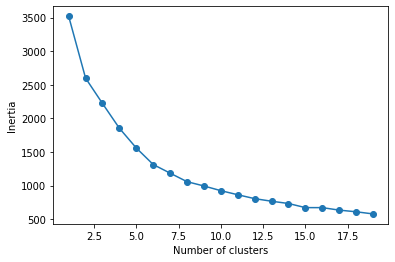

In [15]:
# Converting results into a dataframe to plot them
results = pd.DataFrame({'Cluster': range(1,20), 'Inertia': lst})

plt.figure(figsize=(6, 4))
plt.plot(results['Cluster'], results['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

From this plot. we can tell that we shoul dchoose values where the slope is slowing down but before it starts to plateau which is between 5.0 and 9.0. Let's try using k=6 and see how that goes.

In [20]:
# K means with 6 clusters and k-means+ initialization
kmeans_6 = KMeans(n_jobs=-1, n_clusters = 6,init='k-means++')
kmeans_6.fit(std_df)
pred = kmeans_6.predict(std_df)

In [21]:
# Let's look at the value of the points in each of the 6 clusters|
results2 = pd.DataFrame(std_df)
results2['cluster'] = pred
results2['cluster'].value_counts()

1    172
0    125
4     86
5     46
3     10
2      1
Name: cluster, dtype: int64

This means that there are 172 points in cluster 2, 125 in cluster 1, 86 in cluster 4, etc. since we are 0-indexed.

In [23]:
# The labels for each of the values in our array 
kmeans_6.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       5, 0, 0, 0, 1, 1, 0, 5, 1, 1, 1, 5, 1, 0, 5, 0, 0, 5, 5, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 5, 0, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3,
       1, 0, 1, 1, 5, 5, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 5,
       1, 1, 1, 1, 3, 5, 0, 1, 0, 1, 1, 1, 0, 0, 0, 5, 1, 1, 0, 0, 0, 0,
       1, 0, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 5, 1, 0, 1, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       5, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 5, 0,
       4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 3, 4, 4, 0, 4, 0, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4,
       0, 4, 0, 4, 0, 4, 4, 4, 4, 5, 1, 1, 5, 5, 1, 0, 1, 0, 5, 5, 5, 5,
       1, 1, 1, 5, 1, 1, 1, 0, 4, 0, 4, 0, 0, 4, 0,